<a href="https://colab.research.google.com/github/rzunick/MNA-Proyecto-Integrador-Equipo-43/blob/main/CIFAR_10_Color_Dataset_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from zipfile import ZipFile
import os
import shutil
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import  glob

import os
import  numpy as np
import pandas as pd

import logging

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import numpy as np
import random

# Dataset V4 - 8 Labels - Primary and Secondary Modified Purple/Brown

In [ ]:
# URL of the .zip file in the GitHub repository
github_zip_url = "https://github.com/rzunick/MNA-Proyecto-Integrador-Equipo-43/raw/main/cifar_10_color_v4_balanced.zip?download="

# Path to save the downloaded .zip file
zip_file_path = '/content/cifar_10_color_v4.zip'

# Download the .zip file from GitHub
response = requests.get(github_zip_url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# Verify the download
if response.status_code == 200:
    print("File downloaded successfully")
else:
    print("Failed to download file")

File downloaded successfully


In [ ]:
#Specify zip file path
zip_file_path = '/content/cifar_10_color_v4.zip'

# Confirmar tipo de archivo es tipo .zip
!file /content/cifar_10_color.zip

# Specify the directory where you want to extract the files
extract_to_directory = '/content'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_to_directory)

# Dataset Path
path = '/content/cifar_10_color_v4'

/content/cifar_10_color.zip: cannot open `/content/cifar_10_color.zip' (No such file or directory)


In [ ]:
# Configuration 4: 8 labels
labels = ["Red","Yellow","Blue","Orange","Green","Brown","Black","White"]

def decode_label(index):
    return  labels[index]

def encode_label_from_path(path):
    for index,value in enumerate(labels):
        if value in path:
            return  index

In [ ]:
# Get image list
image_list = glob.glob(os.path.join(path, '**', '*.*'), recursive=True)
class_list = [encode_label_from_path(item) for item in image_list]

# Count the number of images per class
from collections import Counter
label_counts = Counter(class_list)
print("Label counts:", label_counts)

Label counts: Counter({6: 1600, 1: 1600, 7: 1600, 5: 1600, 0: 1600, 4: 1600, 2: 1600, 3: 1600})


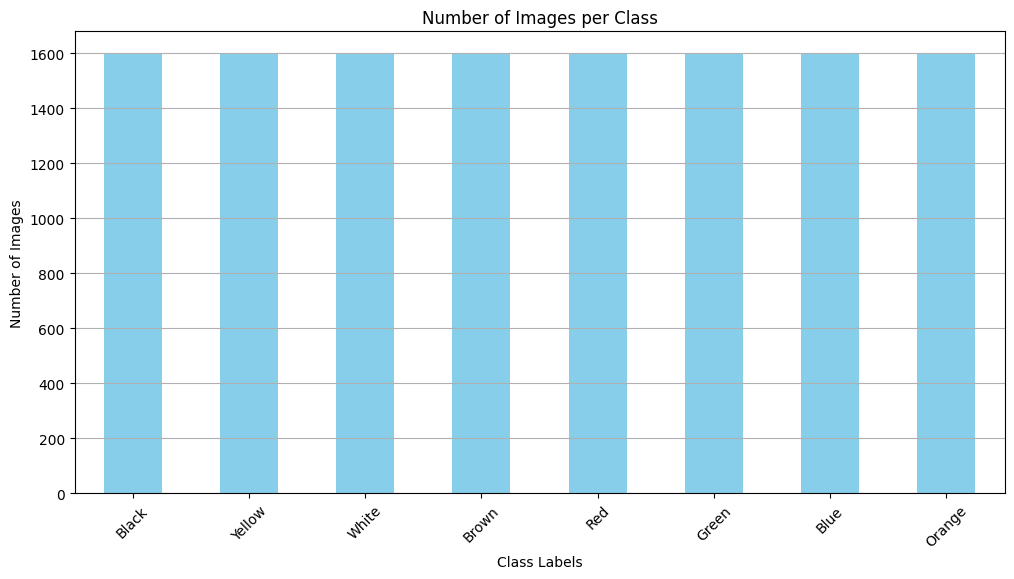

In [ ]:
# Convert the counter to a pandas DataFrame
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])
label_df.index = [labels[idx] for idx in label_df.index]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
label_df['count'].plot(kind='bar', color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

tasks:

Loading Images: The function load_and_process_images loads images from the specified paths and handles any alpha channels by reducing RGBA to RGB. The images are stored in a list as arrays.

Calculating Statistics: It calculates the median and standard deviation of the RGB values across all images with the function rgb_stats. These statistics are computed from all pixels of all images combined into a single array.

Visualization Before Normalization: The function plot_rgb_distribution visually presents the RGB distribution in 3D space for a sample of the pixels. This is done before any normalization to show the original data distribution.

Normalization: Normalization is then applied to the RGB values using the calculated median and standard deviation. This process is intended to adjust the data so that its mean is approximately zero, and it has a uniform standard deviation. The normalization formula used is:

normalized
=
original
−
median
std dev
normalized=
std dev
original−median
​

Visualization After Normalization: Another visualization shows the RGB distribution of the normalized data. Again, only a sample of the pixels is plotted in 3D space to represent the normalized distribution.

Visualizing a Normalized Image: Finally, the code visualizes one example of a normalized image to show the effects of the normalization process on image appearance.

Median RGB: [122. 121. 106.]
Standard Deviation RGB: [63.73303326 62.45320506 67.83328651]


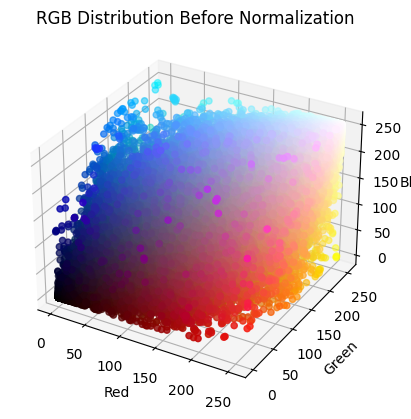

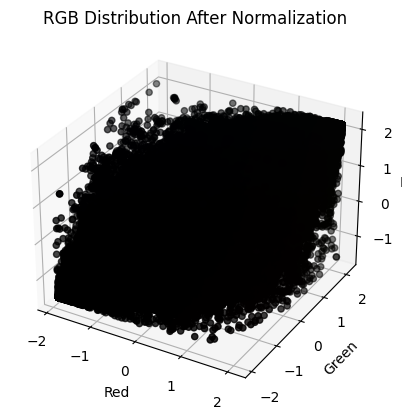

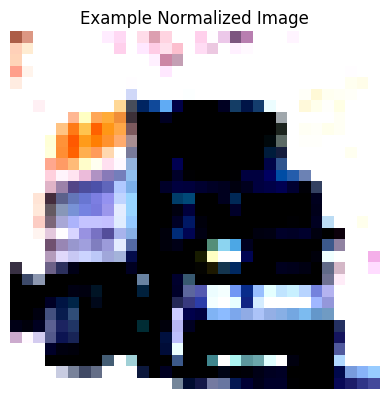

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import numpy as np
import random

def load_and_process_images(image_list):
    # Store all image RGB values
    all_images_rgb = []

    # Load each image and extract RGB values
    for image_path in image_list:
        img = mpimg.imread(image_path)
        if img.shape[-1] == 4:  # Check if the image has an alpha channel
            img = img[:, :, :3]  # Drop alpha channel if present
        all_images_rgb.append(img)

    return all_images_rgb

def rgb_stats(all_images_rgb):
    # Concatenate all image arrays to a single array for easier processing
    all_pixels = np.vstack([img.reshape(-1, 3) for img in all_images_rgb])

    # Compute median and standard deviation
    median_rgb = np.median(all_pixels, axis=0)
    std_dev_rgb = np.std(all_pixels, axis=0)

    return median_rgb, std_dev_rgb

def plot_rgb_distribution(rgb_values, title, sample_fraction=0.01):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Sample a fraction of the pixels
    if sample_fraction < 1:
        sampled_pixels = random.sample(list(rgb_values), int(len(rgb_values) * sample_fraction))
    else:
        sampled_pixels = rgb_values

    sampled_pixels = np.array(sampled_pixels)

    # Extracting RGB components
    r = sampled_pixels[:, 0]
    g = sampled_pixels[:, 1]
    b = sampled_pixels[:, 2]

    # Normalize the colors to [0, 1] for matplotlib and clip to ensure values are within the valid range
    colors = np.clip(np.stack([r, g, b], axis=1) / 255, 0, 1)

    # Plot all points with their corresponding colors
    ax.scatter(r, g, b, c=colors, marker='o')

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(title)
    plt.show()

# Load and process images
all_images_rgb = load_and_process_images(image_list)
median_rgb, std_dev_rgb = rgb_stats(all_images_rgb)

print("Median RGB:", median_rgb)
print("Standard Deviation RGB:", std_dev_rgb)

# Convert images to RGB pixels for plotting
def images_to_rgb_pixels(all_images_rgb):
    all_pixels = np.vstack([img.reshape(-1, 3) for img in all_images_rgb])
    return all_pixels

rgb_pixels = images_to_rgb_pixels(all_images_rgb)

# Plot RGB distribution before normalization with sampling
plot_rgb_distribution(rgb_pixels, "RGB Distribution Before Normalization")

# Normalize RGB values
normalized_rgb_pixels = (rgb_pixels - median_rgb) / std_dev_rgb

# Plot RGB distribution after normalization with sampling
plot_rgb_distribution(normalized_rgb_pixels, "RGB Distribution After Normalization")

# Convert normalized RGB pixels back to images
normalized_images = [(img - median_rgb) / std_dev_rgb for img in all_images_rgb]

# Visualize one of the normalized images
plt.imshow(np.clip(normalized_images[0], 0, 1))
plt.title('Example Normalized Image')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
